In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, roc_auc_score
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.cluster import KMeans
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import accuracy_score, classification_report, roc_auc_score
from sklearn.tree import plot_tree
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import ParameterGrid
from sklearn.metrics import silhouette_score

In [2]:
df= pd.read_csv("../data/clean/loan_accpt_clean_2.csv")

In [3]:
X = df.drop(columns=['Personal Loan','ZIP Code']) 
y = df['Personal Loan']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [4]:
#Logistic Regression
log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)

C:\Users\vasco\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [5]:
y_pred_log_reg = log_reg.predict(X_test)

In [6]:
# Decision Tree Classifier
dtree = DecisionTreeClassifier(random_state=42)
dtree.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

In [7]:
y_pred_dtree = dtree.predict(X_test)

In [8]:
# Random Forest Classifier
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [9]:
y_pred_rf = rf.predict(X_test)

In [10]:
# Evaluation Metrics
print("Logistic Regression:\n", classification_report(y_test, y_pred_log_reg))
print("Decision Tree Classifier:\n", classification_report(y_test, y_pred_dtree))
print("Random Forest Classifier:\n", classification_report(y_test, y_pred_rf))

# ROC AUC Score
print("Logistic Regression ROC AUC:", roc_auc_score(y_test, y_pred_log_reg))
print("Decision Tree Classifier ROC AUC:", roc_auc_score(y_test, y_pred_dtree))
print("Random Forest Classifier ROC AUC:", roc_auc_score(y_test, y_pred_rf))

Logistic Regression:
               precision    recall  f1-score   support

           0       0.95      0.98      0.97       900
           1       0.79      0.55      0.65       100

    accuracy                           0.94      1000
   macro avg       0.87      0.77      0.81      1000
weighted avg       0.94      0.94      0.94      1000

Decision Tree Classifier:
               precision    recall  f1-score   support

           0       0.99      0.99      0.99       900
           1       0.93      0.88      0.90       100

    accuracy                           0.98      1000
   macro avg       0.96      0.94      0.95      1000
weighted avg       0.98      0.98      0.98      1000

Random Forest Classifier:
               precision    recall  f1-score   support

           0       0.98      1.00      0.99       900
           1       0.99      0.82      0.90       100

    accuracy                           0.98      1000
   macro avg       0.98      0.91      0.94      100

In [11]:
#Parameter grid
param_grid = {
    'C': [0.1, 1, 10],
    'solver': ['liblinear', 'saga'],
    'penalty': ['l1', 'l2']
}

# Logistic Regression model
log_reg = LogisticRegression(max_iter=1000)

# GridSearchCV
grid_search = GridSearchCV(log_reg, param_grid, cv=5, n_jobs=-1, verbose=1)
grid_search.fit(X_train, y_train)

# Best parameters
print("Best Parameters:", grid_search.best_params_)

Fitting 5 folds for each of 12 candidates, totalling 60 fits
Best Parameters: {'C': 10, 'penalty': 'l1', 'solver': 'liblinear'}


In [12]:
# Initialize the model with the best parameters
final_log_reg = LogisticRegression(C=10, penalty='l1', solver='liblinear', max_iter=1000)

# Train the model on the training data
final_log_reg.fit(X_train, y_train)

LogisticRegression(C=10, max_iter=1000, penalty='l1', solver='liblinear')

In [13]:
# Make predictions
y_pred = final_log_reg.predict(X_test)
y_prob = final_log_reg.predict_proba(X_test)[:, 1]

# Metrics
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

# ROC-AUC
roc_auc = roc_auc_score(y_test, y_prob)
print("ROC-AUC Score:", roc_auc)

Accuracy: 0.945
Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.99      0.97       900
           1       0.85      0.55      0.67       100

    accuracy                           0.94      1000
   macro avg       0.90      0.77      0.82      1000
weighted avg       0.94      0.94      0.94      1000

ROC-AUC Score: 0.9430666666666666


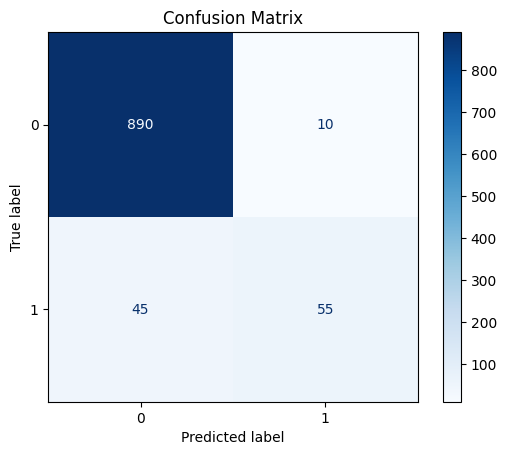

In [14]:
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=final_log_reg.classes_)
disp.plot(cmap='Blues')
plt.title("Confusion Matrix")
plt.show()

In [15]:
# Feature importance
feature_importance = pd.DataFrame({
    'Feature': X_train.columns,
    'Coefficient': final_log_reg.coef_[0]
}).sort_values(by='Coefficient', ascending=False)

print(feature_importance)

               Feature  Coefficient
8           CD Account     3.855843
5            Education     1.864590
3               Family     0.668679
2               Income     0.056286
1           Experience     0.021767
4                CCAvg     0.009882
6             Mortgage     0.000119
0                  Age    -0.018230
9               Online    -0.673609
7   Securities Account    -0.918628
10          CreditCard    -1.253216


In [16]:
#Feature importance
feature_importance = pd.Series(rf.feature_importances_, index=X.columns)
feature_importance_sorted = feature_importance.sort_values(ascending=False)

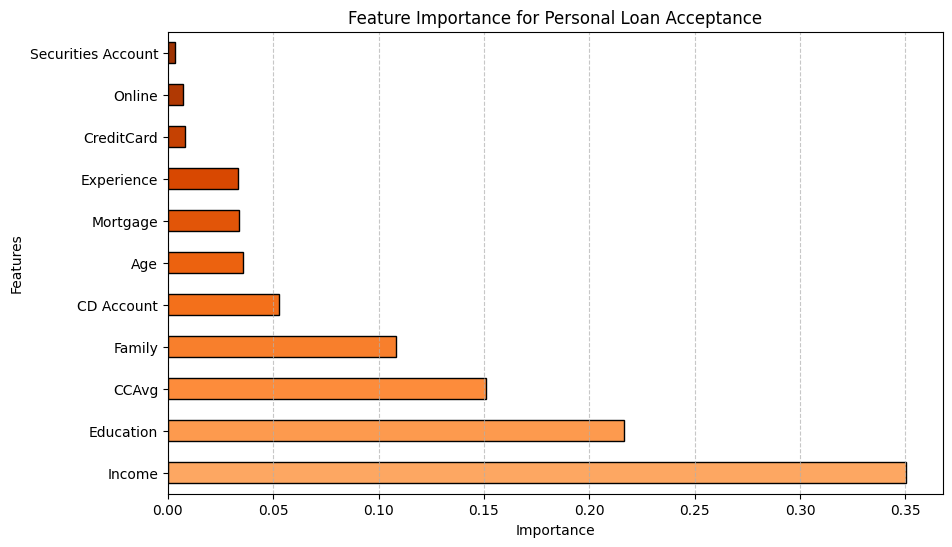

In [17]:
# Generate gradient colors in orange
cmap = plt.cm.Oranges
norm = mcolors.Normalize(vmin=0, vmax=len(feature_importance_sorted))
colors = cmap(np.linspace(0.4, 0.9, len(feature_importance_sorted)))  # Adjust intensity of orange gradient

# Plot
plt.figure(figsize=(10, 6))
feature_importance_sorted.plot(
    kind='barh', 
    color=colors, 
    edgecolor='black'  # this is for the normal random forest
)
plt.title('Feature Importance for Personal Loan Acceptance')
plt.xlabel('Importance')
plt.ylabel('Features')
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.show()

In [18]:
# Define the parameter grid
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto', 'sqrt', 'log2'],
    'bootstrap': [True, False]
}

# Random Forest Classifier
rf = RandomForestClassifier(random_state=42)

# GridSearchCV
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=3, n_jobs=-1, verbose=2)
grid_search.fit(X_train, y_train)

# Best parameters
print("Best Parameters:", grid_search.best_params_)

Fitting 3 folds for each of 486 candidates, totalling 1458 fits


C:\Users\vasco\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:425: FitFailedWarning: 
486 fits failed out of a total of 1458.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
212 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\vasco\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 729, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\vasco\anaconda3\Lib\site-packages\sklearn\base.py", line 1145, in wrapper
    estimator._validate_params()
  File "C:\Users\vasco\anaconda3\Lib\site-packages\sklearn\base.py", line 638, in _validate_params
    validate_parameter_constraints(
  File "C:\Users\vasco\anaconda3\Lib\site-packa

Best Parameters: {'bootstrap': True, 'max_depth': 10, 'max_features': 'sqrt', 'min_samples_leaf': 2, 'min_samples_split': 5, 'n_estimators': 100}


In [19]:
# Initialize the model with the best parameters
final_rf = RandomForestClassifier(
    bootstrap=False,
    max_depth=10,
    max_features='sqrt',
    min_samples_leaf=1,
    min_samples_split=2,
    n_estimators=100,
    random_state=42
)

# Train the model
final_rf.fit(X_train, y_train)

RandomForestClassifier(bootstrap=False, max_depth=10, random_state=42)

In [20]:
# Make predictions
y_pred = final_rf.predict(X_test)
y_prob = final_rf.predict_proba(X_test)[:, 1]

# Evaluate performance
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))
roc_auc = roc_auc_score(y_test, y_prob)
print("ROC-AUC Score:", roc_auc)

Accuracy: 0.981
Classification Report:
               precision    recall  f1-score   support

           0       0.98      1.00      0.99       900
           1       0.98      0.83      0.90       100

    accuracy                           0.98      1000
   macro avg       0.98      0.91      0.94      1000
weighted avg       0.98      0.98      0.98      1000

ROC-AUC Score: 0.9978333333333333


               Feature  Importance
2               Income    0.358227
5            Education    0.222720
4                CCAvg    0.146690
3               Family    0.120978
8           CD Account    0.055551
1           Experience    0.027560
6             Mortgage    0.027211
0                  Age    0.026709
10          CreditCard    0.007027
9               Online    0.004939
7   Securities Account    0.002389


C:\Users\vasco\AppData\Local\Temp\ipykernel_23592\2573162161.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(
C:\Users\vasco\AppData\Local\Temp\ipykernel_23592\2573162161.py:17: UserWarning: Numpy array is not a supported type for `palette`. Please convert your palette to a list. This will become an error in v0.14
  sns.barplot(


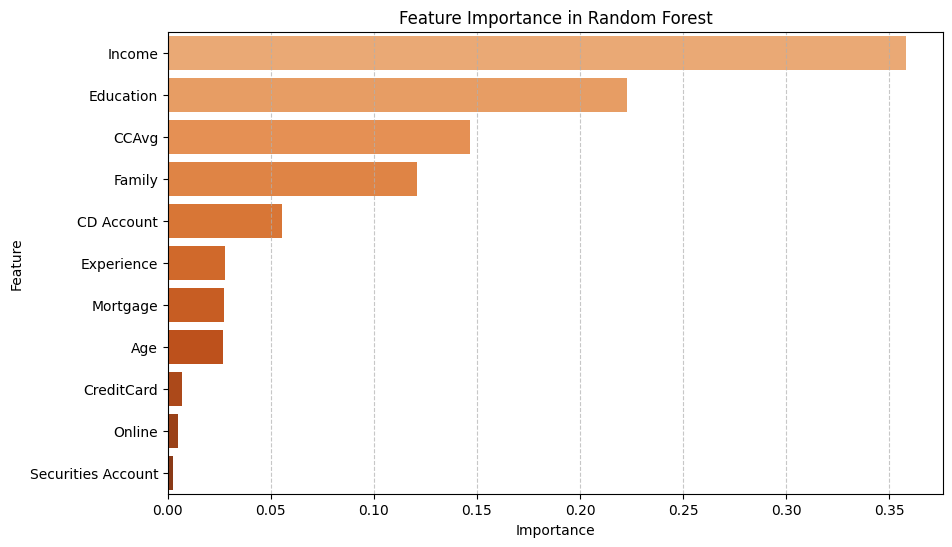

In [21]:
# Feature importance
importances = final_rf.feature_importances_
feature_names = X_train.columns

feature_importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

print(feature_importance_df)

# Sort the data to align with the gradient
feature_importance_df_sorted = feature_importance_df.sort_values(by='Importance', ascending=False)

# Plot
plt.figure(figsize=(10, 6))
sns.barplot(
    x='Importance', 
    y='Feature', 
    data=feature_importance_df_sorted, 
    palette=colors
)
plt.title('Feature Importance in Random Forest')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.show()

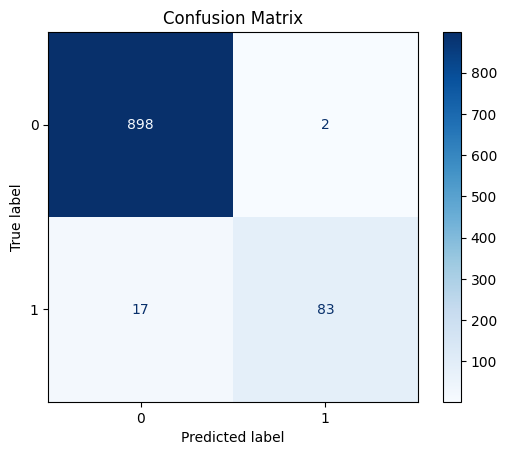

In [22]:
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=final_log_reg.classes_)
disp.plot(cmap='Blues')
plt.title("Confusion Matrix")
plt.show()

In [23]:
cv_scores = cross_val_score(final_rf, X_train, y_train, cv=5, scoring='roc_auc')
print(f"Cross-Validation ROC-AUC Scores: {cv_scores}")
print(f"Mean CV ROC-AUC: {cv_scores.mean():.4f}")

Cross-Validation ROC-AUC Scores: [0.99600174 0.99718305 0.99703766 0.99769192 0.99956322]
Mean CV ROC-AUC: 0.9975


In [24]:
# Parameter grid
param_grid = {
    'max_depth': [3, 5, 7, 10],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'criterion': ['gini', 'entropy']
}

# Decision Tree model
dtree = DecisionTreeClassifier(random_state=42)

# GridSearchCV
grid_search = GridSearchCV(dtree, param_grid, cv=5, n_jobs=-1, verbose=1)
grid_search.fit(X_train, y_train)

# Best parameters
print("Best Parameters:", grid_search.best_params_)

Fitting 5 folds for each of 72 candidates, totalling 360 fits
Best Parameters: {'criterion': 'gini', 'max_depth': 5, 'min_samples_leaf': 2, 'min_samples_split': 2}


In [25]:
final_dtree = DecisionTreeClassifier(
    criterion='gini',
    max_depth=5,
    min_samples_leaf=2,
    min_samples_split=2,
    random_state=42
)
final_dtree.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=5, min_samples_leaf=2, random_state=42)

In [26]:
y_pred = final_dtree.predict(X_test)
y_prob = final_dtree.predict_proba(X_test)[:, 1]

print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))
print("ROC-AUC Score:", roc_auc_score(y_test, y_prob))

Accuracy: 0.986
Classification Report:
               precision    recall  f1-score   support

           0       0.99      1.00      0.99       900
           1       0.97      0.89      0.93       100

    accuracy                           0.99      1000
   macro avg       0.98      0.94      0.96      1000
weighted avg       0.99      0.99      0.99      1000

ROC-AUC Score: 0.9908222222222223


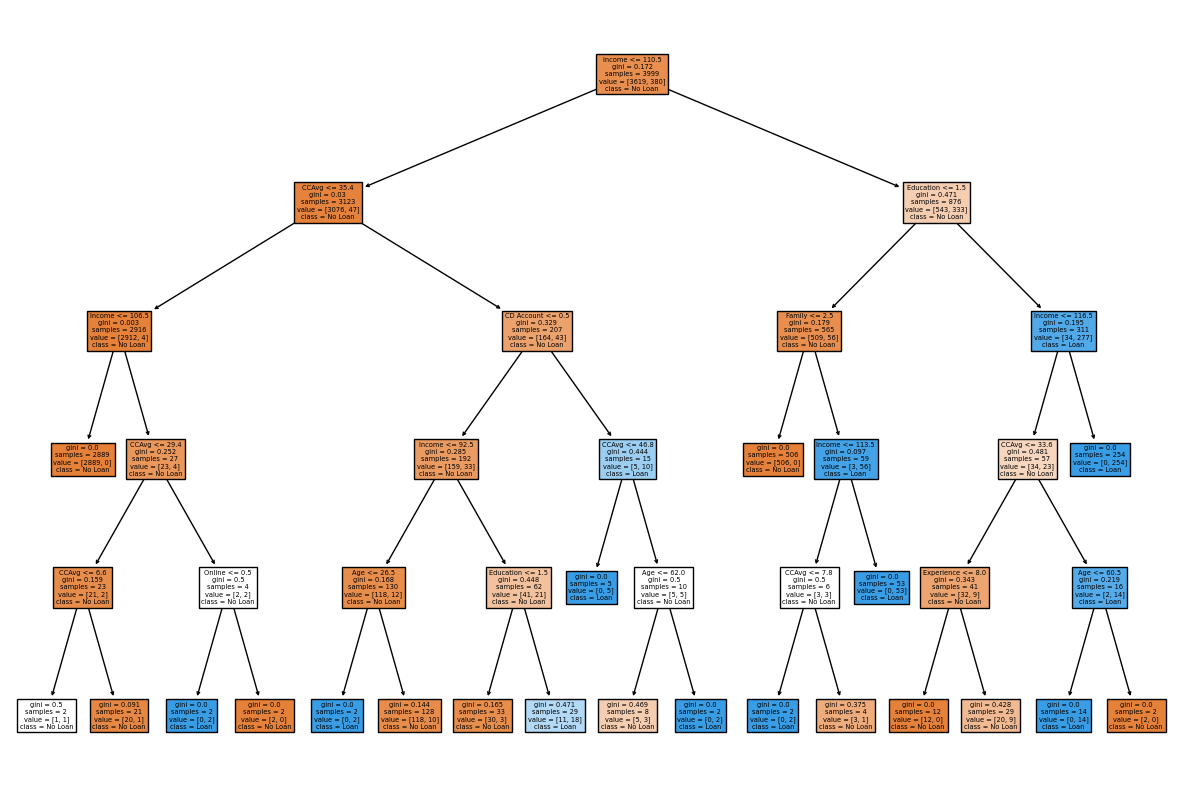

In [27]:
plt.figure(figsize=(15, 10))
plot_tree(
    final_dtree,
    feature_names=X_train.columns,
    class_names=['No Loan', 'Loan'],
    filled=True
)
plt.show()

C:\Users\vasco\AppData\Local\Temp\ipykernel_23592\2123080042.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(
C:\Users\vasco\AppData\Local\Temp\ipykernel_23592\2123080042.py:12: UserWarning: Numpy array is not a supported type for `palette`. Please convert your palette to a list. This will become an error in v0.14
  sns.barplot(


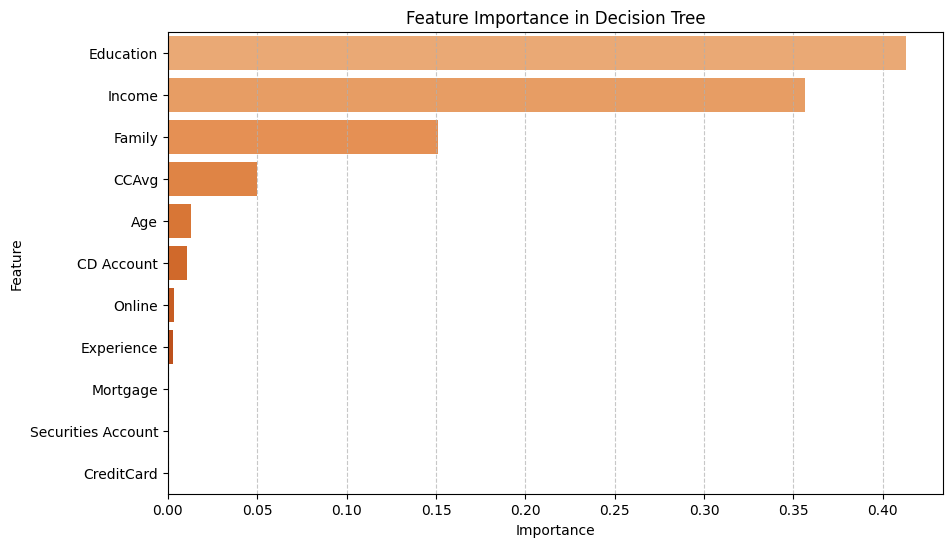

In [28]:
feature_importances = final_dtree.feature_importances_
importance_df = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': feature_importances
}).sort_values(by='Importance', ascending=False)

# Sort the data to align with the gradient
importance_df_sorted = importance_df.sort_values(by='Importance', ascending=False)

# Plot
plt.figure(figsize=(10, 6))
sns.barplot(
    x='Importance', 
    y='Feature', 
    data=importance_df_sorted, 
    palette=colors
)
plt.title('Feature Importance in Decision Tree')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.show()

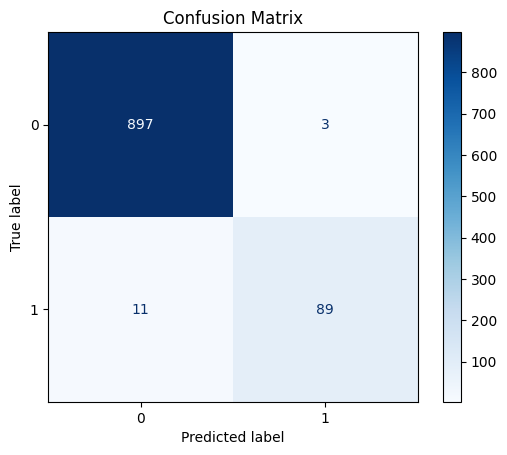

In [29]:
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=final_log_reg.classes_)
disp.plot(cmap='Blues')
plt.title("Confusion Matrix")
plt.show()

C:\Users\vasco\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


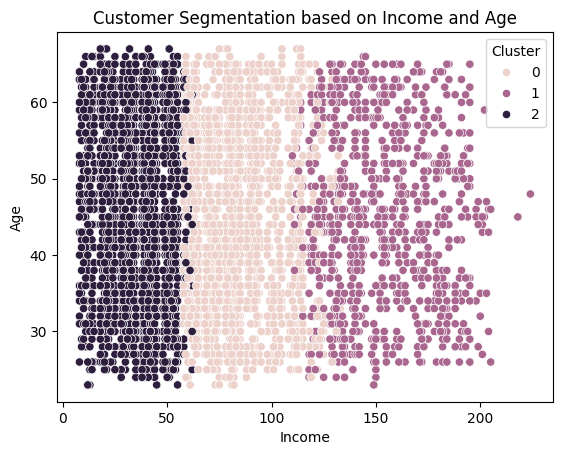

In [30]:
# Using features like Income, Age, Family, etc.
X_cluster = df[['Income', 'Education', 'Family', 'CCAvg']]

# Perform KMeans clustering
kmeans = KMeans(n_clusters=3, random_state=42)
df['Cluster'] = kmeans.fit_predict(X_cluster)

# Visualizing clusters
sns.scatterplot(x='Income', y='Age', hue='Cluster', data=df)
plt.title('Customer Segmentation based on Income and Age')
plt.show()

In [31]:
# Create the KNN model
knn_model = KNeighborsClassifier(n_neighbors=5)

In [32]:
# Train the model
knn_model.fit(X_train, y_train)

KNeighborsClassifier()

In [33]:
# Evaluate the model
y_pred_knn = knn_model.predict(X_test)
accuracy_knn = accuracy_score(y_test, y_pred_knn)
print(f"KNN Accuracy: {accuracy_knn:.4f}")

# Confusion matrix
print(confusion_matrix(y_test, y_pred_knn))
print(classification_report(y_test, y_pred_knn))

KNN Accuracy: 0.9140
[[878  22]
 [ 64  36]]
              precision    recall  f1-score   support

           0       0.93      0.98      0.95       900
           1       0.62      0.36      0.46       100

    accuracy                           0.91      1000
   macro avg       0.78      0.67      0.70      1000
weighted avg       0.90      0.91      0.90      1000



In [34]:
param_grid = {
    'n_neighbors': [3, 5, 7, 9, 11],  # Number of neighbors
    'weights': ['uniform', 'distance'],  # Weight function
    'metric': ['euclidean', 'manhattan', 'minkowski']  # Distance metric
}

# Model
knn = KNeighborsClassifier()

# GridSearchCV
grid_search_knn = GridSearchCV(knn, param_grid, cv=5, n_jobs=-1, verbose=1)
grid_search_knn.fit(X_train, y_train)

# Best parameters
print("Best Parameters for KNN:", grid_search_knn.best_params_)

Fitting 5 folds for each of 30 candidates, totalling 150 fits
Best Parameters for KNN: {'metric': 'manhattan', 'n_neighbors': 5, 'weights': 'distance'}


In [35]:
# Initialize the KNN classifier with the best parameters
knn = KNeighborsClassifier(metric='manhattan', n_neighbors=5, weights='distance')

# Fit the model on the training data
knn.fit(X_train, y_train)

KNeighborsClassifier(metric='manhattan', weights='distance')

In [36]:
# Make predictions on the test set
y_pred = knn.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")
print("Classification Report:")
print(classification_report(y_test, y_pred))

Accuracy: 0.93
Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.99      0.96       900
           1       0.78      0.38      0.51       100

    accuracy                           0.93      1000
   macro avg       0.86      0.68      0.74      1000
weighted avg       0.92      0.93      0.92      1000



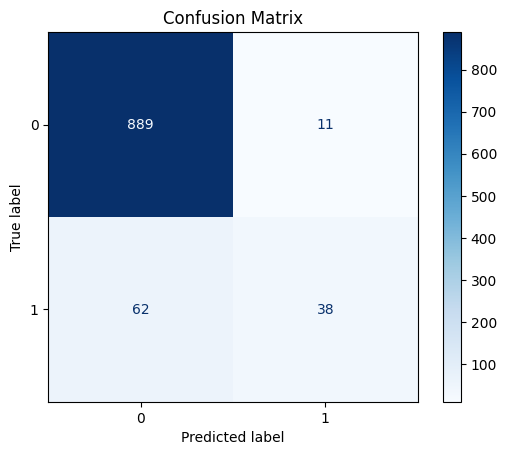

In [37]:
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=final_log_reg.classes_)
disp.plot(cmap='Blues')
plt.title("Confusion Matrix")
plt.show()

In [38]:
svm_model = SVC(kernel='linear', C=5, gamma='scale')

In [39]:
svm_model.fit(X_train, y_train)

SVC(C=5, kernel='linear')

In [40]:
# Evaluate the model
y_pred_svm = svm_model.predict(X_test)
accuracy_svm = accuracy_score(y_test, y_pred_svm)
print(f"SVM Accuracy: {accuracy_svm:.4f}")

# Confusion matrix
print(confusion_matrix(y_test, y_pred_svm))
print(classification_report(y_test, y_pred_svm))

SVM Accuracy: 0.9450
[[893   7]
 [ 48  52]]
              precision    recall  f1-score   support

           0       0.95      0.99      0.97       900
           1       0.88      0.52      0.65       100

    accuracy                           0.94      1000
   macro avg       0.92      0.76      0.81      1000
weighted avg       0.94      0.94      0.94      1000



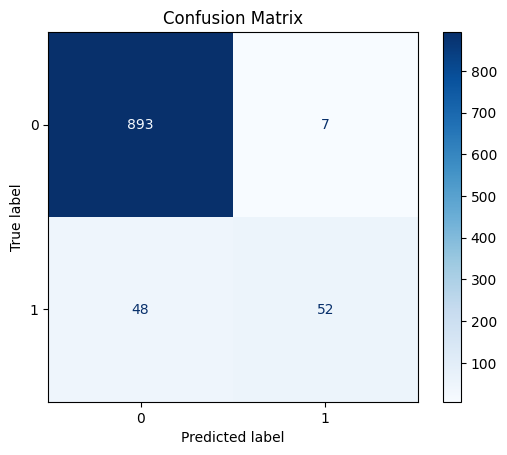

In [41]:
cm = confusion_matrix(y_test, y_pred_svm)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=final_log_reg.classes_)
disp.plot(cmap='Blues')
plt.title("Confusion Matrix")
plt.show()

In [42]:
# Create the Naive Bayes model
nb_model = GaussianNB()

In [43]:
# Train the model
nb_model.fit(X_train, y_train)

GaussianNB()

In [44]:
# Evaluate the model
y_pred_nb = nb_model.predict(X_test)
accuracy_nb = accuracy_score(y_test, y_pred_nb)
print(f"Naive Bayes Accuracy: {accuracy_nb:.4f}")

# Confusion matrix
print(confusion_matrix(y_test, y_pred_nb))
print(classification_report(y_test, y_pred_nb))

Naive Bayes Accuracy: 0.8890
[[832  68]
 [ 43  57]]
              precision    recall  f1-score   support

           0       0.95      0.92      0.94       900
           1       0.46      0.57      0.51       100

    accuracy                           0.89      1000
   macro avg       0.70      0.75      0.72      1000
weighted avg       0.90      0.89      0.89      1000



In [45]:
param_grid = {
    'var_smoothing': [1e-9, 1e-8, 1e-7, 1e-6, 1e-5]  # Smoothing parameter
}

# Model
gnb = GaussianNB()

# GridSearchCV
grid_search_gnb = GridSearchCV(gnb, param_grid, cv=5, n_jobs=-1, verbose=1)
grid_search_gnb.fit(X_train, y_train)

# Best parameters
print("Best Parameters for GaussianNB:", grid_search_gnb.best_params_)

Fitting 5 folds for each of 5 candidates, totalling 25 fits
Best Parameters for GaussianNB: {'var_smoothing': 1e-05}


In [46]:
# Initialize the GaussianNB classifier with the best parameter
gnb = GaussianNB(var_smoothing=1e-05)

# Fit the model on the training data
gnb.fit(X_train, y_train)

GaussianNB(var_smoothing=1e-05)

In [47]:
# Predict on the test set
y_pred = gnb.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")
print("Classification Report:")
print(classification_report(y_test, y_pred))

Accuracy: 0.91
Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.95      0.95       900
           1       0.55      0.57      0.56       100

    accuracy                           0.91      1000
   macro avg       0.75      0.76      0.76      1000
weighted avg       0.91      0.91      0.91      1000



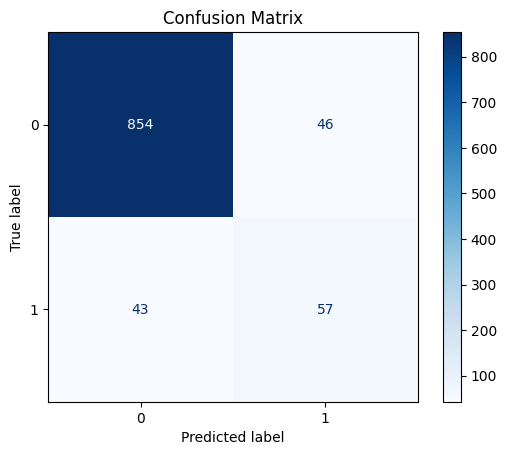

In [48]:
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=final_log_reg.classes_)
disp.plot(cmap='Blues')
plt.title("Confusion Matrix")
plt.show()

In [49]:
# Apply KMeans clustering
# Perform KMeans clustering
kmeans = KMeans(n_clusters=2, random_state=42)
X_clustered = X.iloc[:, :2] 
kmeans.fit(X_clustered)

C:\Users\vasco\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


KMeans(n_clusters=2, random_state=42)

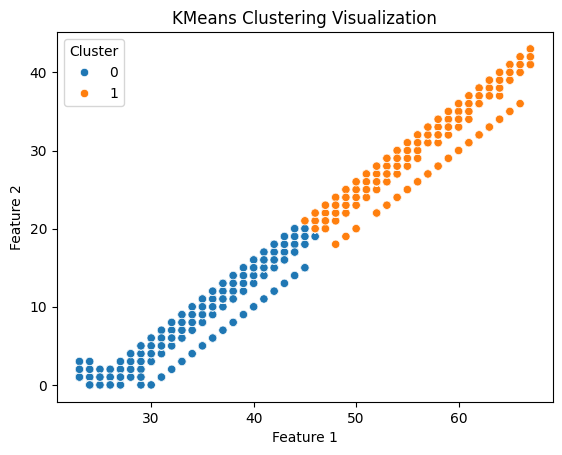

In [50]:
# Add cluster labels to the dataset
df['Cluster'] = kmeans.labels_

# Plot clusters
sns.scatterplot(x=X_clustered.iloc[:, 0], y=X_clustered.iloc[:, 1], hue=df['Cluster'])
plt.title('KMeans Clustering Visualization')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()

In [51]:
param_grid = {
    'n_clusters': [2, 3, 4, 5, 6],  # Number of clusters
    'init': ['k-means++', 'random'],  # Initialization method
    'max_iter': [100, 200, 300],  # Maximum iterations
    'n_init': [10, 20, 30]  # Number of initializations
}

# Model
kmeans = KMeans(random_state=42)

# GridSearchCV (use Silhouette Score for evaluation
for params in ParameterGrid(param_grid):
    kmeans.set_params(**params)
    kmeans.fit(X_train)
    silhouette_avg = silhouette_score(X_train, kmeans.labels_)
    print(f"Parameters: {params}, Silhouette Score: {silhouette_avg}")

Parameters: {'init': 'k-means++', 'max_iter': 100, 'n_clusters': 2, 'n_init': 10}, Silhouette Score: 0.5979060819505004
Parameters: {'init': 'k-means++', 'max_iter': 100, 'n_clusters': 2, 'n_init': 20}, Silhouette Score: 0.5979060819505004
Parameters: {'init': 'k-means++', 'max_iter': 100, 'n_clusters': 2, 'n_init': 30}, Silhouette Score: 0.5979060819505004
Parameters: {'init': 'k-means++', 'max_iter': 100, 'n_clusters': 3, 'n_init': 10}, Silhouette Score: 0.5485082196195705
Parameters: {'init': 'k-means++', 'max_iter': 100, 'n_clusters': 3, 'n_init': 20}, Silhouette Score: 0.5485082196195705
Parameters: {'init': 'k-means++', 'max_iter': 100, 'n_clusters': 3, 'n_init': 30}, Silhouette Score: 0.5485082196195705
Parameters: {'init': 'k-means++', 'max_iter': 100, 'n_clusters': 4, 'n_init': 10}, Silhouette Score: 0.48663600721601674
Parameters: {'init': 'k-means++', 'max_iter': 100, 'n_clusters': 4, 'n_init': 20}, Silhouette Score: 0.48663600721601674
Parameters: {'init': 'k-means++', 'max

In [52]:
# Optimal parameters
kmeans = KMeans(
    init='k-means++',
    max_iter=100,
    n_clusters=2,
    n_init=10,
    random_state=42 
)

# Fit the model
kmeans.fit(df)

KMeans(max_iter=100, n_clusters=2, n_init=10, random_state=42)

In [53]:
X = df.drop(columns=['Personal Loan'])
y = df['Personal Loan']

In [54]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [55]:
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

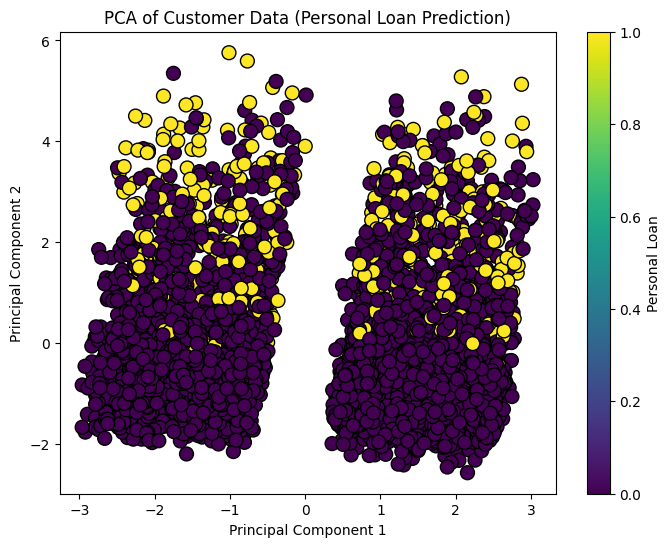

Explained variance ratio by each principal component: [0.21793772 0.14530697]


In [56]:
plt.figure(figsize=(8, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y, cmap='viridis', edgecolor='k', s=100)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA of Customer Data (Personal Loan Prediction)')
plt.colorbar(label='Personal Loan')
plt.show()

print(f'Explained variance ratio by each principal component: {pca.explained_variance_ratio_}')

In [57]:
# Create and train the AdaBoost model
adaboost_model = AdaBoostClassifier(n_estimators=100, random_state=42)
adaboost_model.fit(X_train, y_train)

AdaBoostClassifier(n_estimators=100, random_state=42)

In [58]:
# Evaluate the model
y_pred_adaboost = adaboost_model.predict(X_test)
accuracy_adaboost = accuracy_score(y_test, y_pred_adaboost)
print(f"AdaBoost Accuracy: {accuracy_adaboost:.4f}")

# Confusion matrix
print(confusion_matrix(y_test, y_pred_adaboost))
print(classification_report(y_test, y_pred_adaboost))

AdaBoost Accuracy: 0.9640
[[889  11]
 [ 25  75]]
              precision    recall  f1-score   support

           0       0.97      0.99      0.98       900
           1       0.87      0.75      0.81       100

    accuracy                           0.96      1000
   macro avg       0.92      0.87      0.89      1000
weighted avg       0.96      0.96      0.96      1000



In [59]:
param_grid = {
    'n_estimators': [50, 100, 150], 
    'learning_rate': [0.01, 0.1, 1],  
    'algorithm': ['SAMME', 'SAMME.R'] 
}

# Model
adaboost = AdaBoostClassifier(random_state=42)

# GridSearchCV
grid_search_ada = GridSearchCV(adaboost, param_grid, cv=5, n_jobs=-1, verbose=1)
grid_search_ada.fit(X_train, y_train)

# Best parameters
print("Best Parameters for AdaBoost:", grid_search_ada.best_params_)

Fitting 5 folds for each of 18 candidates, totalling 90 fits
Best Parameters for AdaBoost: {'algorithm': 'SAMME.R', 'learning_rate': 1, 'n_estimators': 150}


In [60]:
# Initialize AdaBoost with the specified best parameters
adaboost = AdaBoostClassifier(
    algorithm='SAMME.R',  
    learning_rate=1,   
    n_estimators=150,  
    random_state=42  
)

# Train the model
adaboost.fit(X_train, y_train)

AdaBoostClassifier(learning_rate=1, n_estimators=150, random_state=42)

In [61]:
# Predict on the test set
y_pred = adaboost.predict(X_test)

# Calculate the accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.4f}")

Accuracy: 0.9660


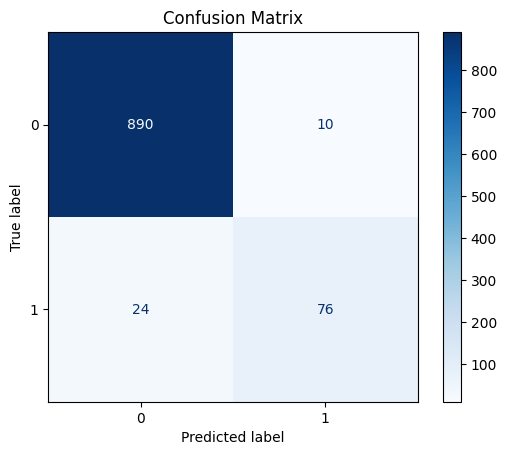

In [62]:
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=final_log_reg.classes_)
disp.plot(cmap='Blues')
plt.title("Confusion Matrix")
plt.show()